<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
#description of our dataframe
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#It seems there is an unused column so I will drop that

In [9]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [10]:
for column in df.columns:
    print(column)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [11]:
# Going to use the id column as my index column
df.set_index('id', inplace= True)

#### Visulization

<AxesSubplot:>

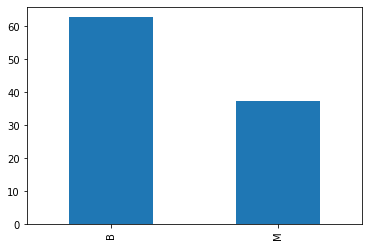

In [12]:
(df.diagnosis.value_counts(normalize = True)*100).plot(kind = 'bar', stacked=True)

In [13]:
print(f'Diagnostic percentage: \n{(df.diagnosis.value_counts(normalize = True)*100).round(2)}')

Diagnostic percentage: 
B    62.74
M    37.26
Name: diagnosis, dtype: float64


In [14]:
def facet(dataframe, feature, hue = 'diagnosis'):
    facet = sns.FacetGrid(dataframe, hue = hue, aspect = 4)
    facet.map(sns.kdeplot, feature, shade = True)
    facet.set(xlim=(0, dataframe[feature].max()))
    facet.add_legend()
    plt.show()

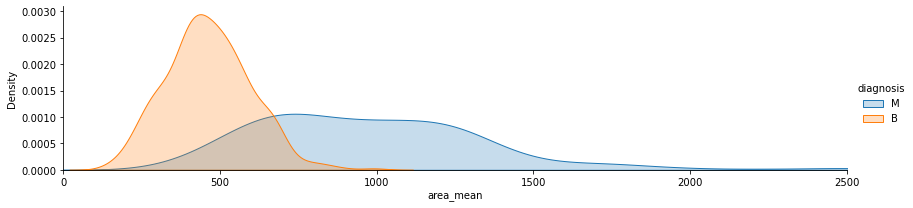

In [15]:
facet(df, 'area_mean')

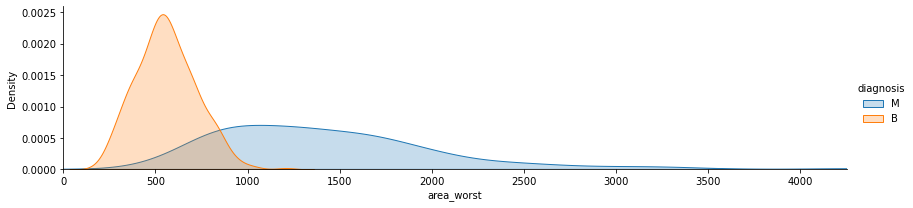

In [16]:
facet(df, 'area_worst')

<AxesSubplot:xlabel='area_mean', ylabel='Percent'>

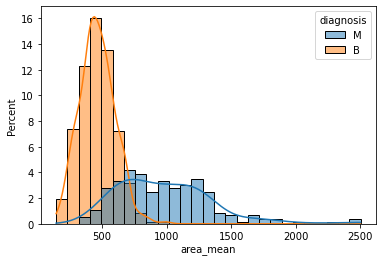

In [17]:
sns.histplot(x = 'area_mean', hue = 'diagnosis', stat = 'percent', kde = True, data = df)

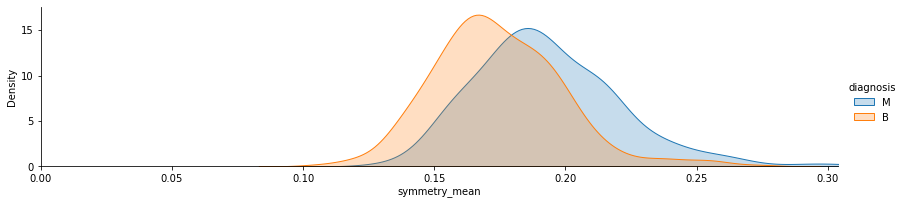

In [18]:
facet(df, 'symmetry_mean')

<AxesSubplot:>

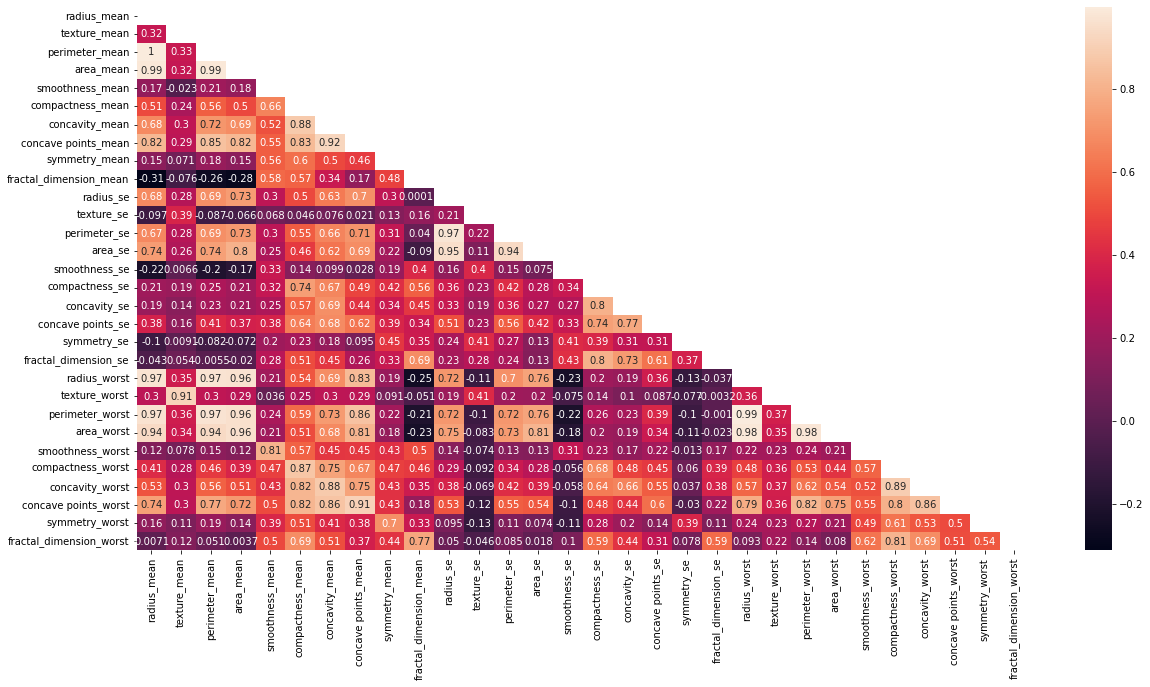

In [19]:
#Generate a mask for the upper triangle
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,10))

sns.heatmap(data = df.corr(), mask = mask, annot=True)

In [21]:
df_w_dummies = pd.get_dummies(data = df, columns = ['diagnosis'])
df_w_dummies.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [22]:
df_w_dummies.rename(columns = {'diagnosis_B': 'cancer'}, inplace = True)
df_w_dummies.drop(labels = 'diagnosis_M', axis = 1, inplace = True)

In [23]:
df_w_dummies.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [51]:
#target variable
dep_var = 'diagnosis'
#feature variables
indep_var = df.columns.drop(labels = dep_var)

#dataframe with independent variables
X = df[indep_var]
#dataframe with dependent variable
y = df[dep_var]
#split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
#create the model
logreg = LogisticRegression(max_iter = 5000)
#fit data to model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [52]:
logreg.score(X_train, y_train)

0.9647887323943662

In [53]:
logreg.score(X_test, y_test)

0.9440559440559441

In [54]:
y_pred_class = logreg.predict(X_train)
print(confusion_matrix(y_train, y_pred_class))

[[261   8]
 [  7 150]]


In [26]:
print(classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           B       0.98      0.99      0.98       252
           M       0.98      0.96      0.97       146

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



In [55]:
y_pred_class = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[85  3]
 [ 5 50]]


In [56]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           B       0.94      0.97      0.96        88
           M       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [57]:
# predict test class:
y_pred_test = logreg.predict(X_test)

# predicted test probability:
y_pred_prob = logreg.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [71]:
# Using classification report
class_r = classification_report(y_test, y_pred_test, labels=['M', 'B'],target_names = ['is_cancer','is_healthy'], output_dict = True)

In [62]:
# ANSWER
#store the confusion matrix in a variable
conf_mat = confusion_matrix(y_test, y_pred_test, labels=['M', 'B'])
#create the dataframe from the array stored in conf_mat
df_conf_mat = pd.DataFrame(data = conf_mat, index = ['is_cancer', 'is_healthy'], columns = ['predicted_cancer', 'predicted_healthy'])

In [63]:
conf_mat

array([[50,  5],
       [ 3, 85]])

#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [64]:
# ANSWER
    # easy way
    # accuracy_score(y_test, y_pred_test)
# as described above    
df_conf_mat = df_conf_mat.astype(float)
accuracy = (df_conf_mat.iloc[0,0] + df_conf_mat.iloc[1,1]) / df_conf_mat.sum().sum()
accuracy
# use float to perform true division, not integer division

0.9440559440559441

In [65]:
# From classification report
class_r['accuracy']

0.9440559440559441

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [76]:
# ANSWER
    # easy ways
    # 1 - accuracy_score(y_test, y_pred_test)
    # or
    # 1 - accuracy
misclass_r = (df_conf_mat.iloc[0,1] + df_conf_mat.iloc[1,0]) / df_conf_mat.sum().sum()
misclass_r

0.055944055944055944

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [75]:
# ANSWER
sensitivity = df_conf_mat.iloc[1,1] / df_conf_mat.loc['is_healthy'].sum()
sensitivity

0.9659090909090909

In [74]:
# recall for healthy is the sensitivity
class_r['is_healthy']['recall']

0.9659090909090909

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [72]:
# ANSWER
specificity = df_conf_mat.iloc[0,0]/(df_conf_mat.iloc[0,0]+df_conf_mat.iloc[0,1])
specificity

0.9090909090909091

In [73]:
# recall for cancer is the specificity
class_r['is_cancer']['recall']

0.9090909090909091

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [39]:
# ANSWER
false_pos_r = df_conf_mat.iloc[0,1]/(df_conf_mat.iloc[0,0] + df_conf_mat.iloc[0,0])
false_pos_r

0.014705882352941176

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [77]:
# ANSWER
true_pos_r = df_conf_mat.iloc[1,1]/(df_conf_mat.iloc[1,1] + df_conf_mat.iloc[0,1])
true_pos_r

0.9444444444444444

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [78]:
# ANSWER
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_pp.head(10)
# Get the predicted probability vector and explicitly name the columns:)

,class_B_pp,class_M_pp
0,0.378463,0.621537
1,0.306927,0.693073
2,0.998964,0.001036
3,0.006370,0.993630
4,0.139939,0.860061
5,0.000450,0.999550
6,0.000317,0.999683
7,0.055907,0.944093
8,0.999657,0.000343
9,0.991354,0.008646


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [79]:
from sklearn.metrics import roc_curve, auc

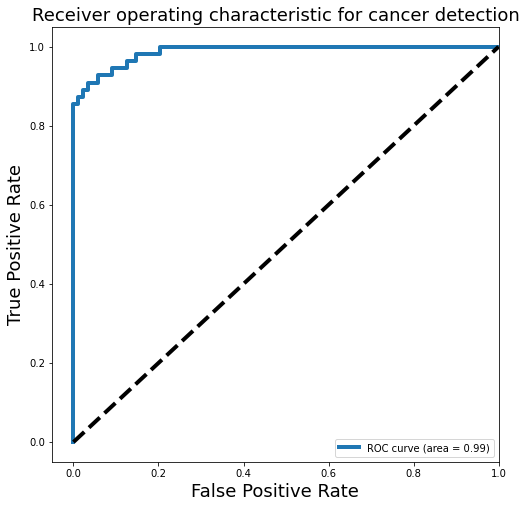

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [82]:
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_M_pp'], pos_label='M')
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



